### Author: Navule Pavan Kumar Rao 
## kNN Implementation from the scratch

In [1]:
import pandas as pd
import numpy as np
import random
from random import randint

Build your own dataset (with unique data-points) using Python libraries. The dataset
must consist of at least 1000 data-points in the form (ID,A,B,C,D,E,F,Class) where

0 ≤ A, B, C, D, E, F ≤ 100                         (1)


and ID is the sequentially generated number of that data-point. The value of Class is
0 or 1 (randomly assigned).

In [2]:
no_of_data_points=1000
#generate 1000 random binary digits either 0 or 1 for Class column
cls=[randint(0,1) for p in range(0,no_of_data_points)]

In [3]:
#define dictionary with columns A to F and Class
dataSet={
            'A':[randint(0,100) for p in range(0,no_of_data_points)],
            'B':[randint(0,100) for p in range(0,no_of_data_points)],
            'C':[randint(0,100) for p in range(0,no_of_data_points)],
            'D':[randint(0,100) for p in range(0,no_of_data_points)],
            'E':[randint(0,100) for p in range(0,no_of_data_points)],
            'F':[randint(0,100) for p in range(0,no_of_data_points)],
            'CLASS':cls
        }

In [4]:
#convert that dataSet to pandas data frame for futher manipulation
df = pd.DataFrame(dataSet, columns= ['A','B','C','D','E','F','CLASS'])

In [5]:
df.shape

(1000, 7)

In [6]:
df.head()

,A,B,C,D,E,F,CLASS
0,40,54,22,88,9,99,1
1,93,63,46,29,91,82,1
2,23,17,42,4,48,6,1
3,43,96,96,61,64,41,0
4,72,40,87,35,19,97,1


In [7]:
df.tail()

,A,B,C,D,E,F,CLASS
995,86,83,99,74,0,8,1
996,50,16,98,86,1,19,1
997,99,31,31,66,15,57,1
998,20,39,32,88,37,4,0
999,100,93,36,13,40,66,0


In [8]:
df.groupby(level=0).first().shape #Check for uniqueness of the data

(1000, 7)

#### Create a random 80-20 split of the data into train and test respectively.

In [9]:
#Create a random 80-20 split of the data into train and test respectively
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [10]:
len(train),len(test)

(800, 200)

#### Store them in two different csv files.

In [11]:
#create directory 'output\1_kNN' if it doesn't exists
import os, errno
output_folder='output\\1_kNN'
try:
    os.makedirs(output_folder)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

In [12]:
df.to_csv(output_folder + '\\dataset.csv',sep=',',encoding='utf-8',index=False)

In [13]:
#place train and test data in separate files in the output directory created
#following command generates train.csv file with , separated columns in output folder
train.to_csv(output_folder + '\\train.csv',sep=',',encoding='utf-8',index=False)

In [14]:
#following command generates test.csv file with tab separated columns in output folder
test.to_csv(output_folder + '\\test.csv',sep=',',encoding='utf-8',index=False)

####  Plot the train data and test data with different labels on the same plot.

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap

In [16]:
#select features A, B, C. 
from sklearn import neighbors, datasets

def plot_features(ax, data_to_plt, c1,c2):
    features_considered=6
    X= data_to_plt[data_to_plt.columns.values.tolist()[0:features_considered]]
    y=data_to_plt['CLASS']
    plot_feat = X.columns.values.tolist()[:-1]
    plt.scatter(X[y==0]['A'], X[y==0]['B'], s=4,label='0', c=c1)
    plt.scatter(X[y==1]['A'], X[y==1]['B'], s=4,label='1', c=c2)
    ax.set_xlabel("feature A")
    ax.set_ylabel("feature B")
    return plt


##### Following 2 dimensional slicing we plot considering features A, B
http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/ 

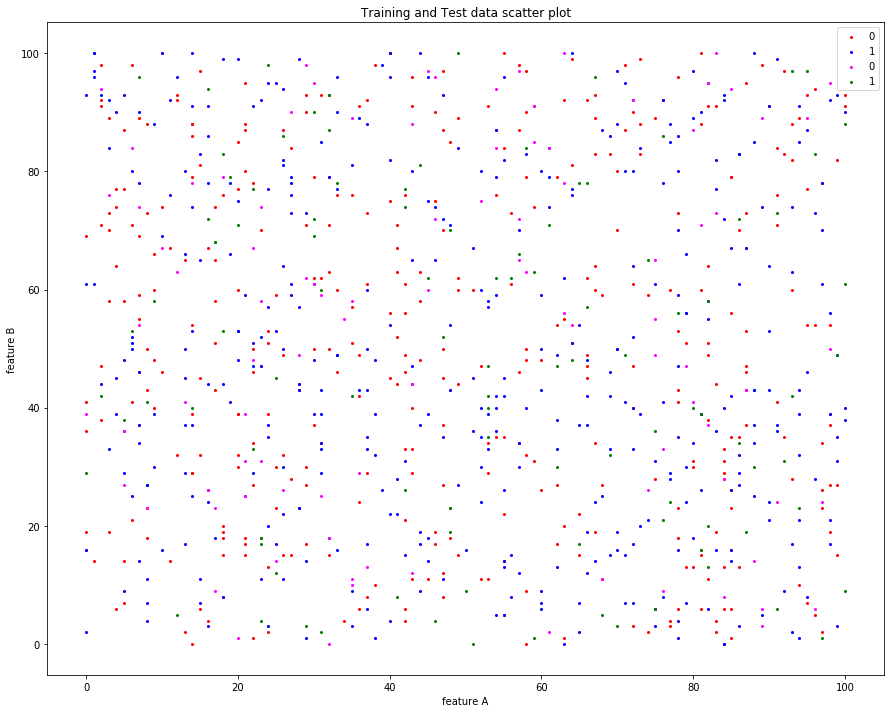

In [17]:
fig1, ax1 = plt.subplots(figsize=(15, 12))
plt.title('Training and Test data scatter plot')

p1=plot_features(ax1,train, 'red','blue')
p2=plot_features(ax1,test,'magenta','green')
p1.legend(loc='best')
p2.savefig(output_folder+'\\1_train_and_test_data.png')
p2.show()

### Lets do some preprocessing

In [18]:
train=np.array(train)
test=np.array(test)

In [19]:
# we observe that training has 80% data i.e., 800 rows 
# and test set has 20% data i.e., 200 rows
train.shape, test.shape

((800, 7), (200, 7))

In [20]:
test[0],test[0][:-1], train[:5]

(array([17, 23, 47, 59, 77, 52,  0], dtype=int64),
 array([17, 23, 47, 59, 77, 52], dtype=int64),
 array([[ 73,  99,  84,  40,  95,  11,   0],
        [ 35,   9,  18,  18,  42,   5,   1],
        [ 93,  82,  32,  18,  72,  43,   0],
        [ 91,  36,  62,  67,  40,  98,   1],
        [ 80,  34,   2,  11, 100,  21,   1]], dtype=int64))

### kNN Algorithm Steps:

  For every point in our dataset:
  
    1 Calculate the distance between two data points train dataset and test data point (like Euclidean distance, Hamming distance. We will be using Euclidean distance)
    
    2 Sort the distances in increasing order
    
    3 Take k items with lowest distances to train data
    
    4 Find the majority class among these items
    
    5 Return the majority class as our prediction for the class of train dataset

#### Lets implement code for each and every step 

##### 1 Calculate the distance between two data points train dataset and test data point

In [21]:
import math
def get_euclidian_distance(d1, d2):
    points = zip(d1,d2)
    squared_diffs = [pow(a - b, 2) for (a, b) in points]
    sum_of_squred_diffs = sum(squared_diffs)
    eu_distance = math.sqrt(sum_of_squred_diffs)
    return eu_distance

In [22]:
get_euclidian_distance(train[0][:-1],train[9][:-1])

116.9529820055906

##### 2 Sort the distances in increasing order
##### 3 Take k items with lowest distances to train data

In [23]:
#2 Sort the distances in increasing order
#3 Take k items with lowest distances to train data
from operator import itemgetter
 
def get_neighbours(train_set, test_data):
    distances = [get_dist_and_train_data(train_data, test_data) for train_data in train_set]
 
    # index 0 is the train_data
    # index 1 is the calculated distance between train_data and test_data
    sorted_distances = sorted(distances, key=itemgetter(1))
    #print(sorted_distances)
    # extract only training instances
    sorted_training_instances = [tuple[0] for tuple in sorted_distances]
 
    # return k Nearest Neighbours (as these are sorted in increasing order of distances)
    return sorted_training_instances
 
def get_dist_and_train_data(train_data, test_data):
    #test_data[:-1] as the last element in it is the classification data
    return (train_data, get_euclidian_distance(test_data[:-1], train_data))

In [24]:
test[3],get_neighbours(train[:50],test[3][:-1])[:3]

(array([91,  6, 87, 12, 11, 73,  1], dtype=int64),
 [array([66, 19, 64, 16, 12,  7,  1], dtype=int64),
  array([97,  2, 57, 47, 12,  4,  0], dtype=int64),
  array([85,  6, 91, 51, 50, 18,  0], dtype=int64)])

##### 4 Find the majority class among these items
##### 5 Return the majority class as our prediction for the class of train dataset

In [25]:
#4 Find the majority class among these items
#5 Return the majority class as our prediction for the class of train dataset
from collections import Counter
def get_majority_class(neighbours):
    # index -1 is the class
    classes = [neighbour[-1] for neighbour in neighbours]
    count = Counter(classes)
    if len(count)>0:
        return count.most_common(1)[0][0]

### Custom kNN Alogrithm Implementation

In [26]:
from sklearn.metrics import classification_report, accuracy_score
def get_kNN(k):
    if(k==0):
        raise ValueError('min k value should be 1')
    predicted_values=[]
    actual_values=[]
    tlen=len(test)
    for i in range(tlen):
        #pass the test data excluding the class ,:-1
        nbrs=get_neighbours(train, test[i,:-1])[:k]
        classified = get_majority_class(nbrs)
        predicted_values.append(classified)
        actual_values.append(test[i,-1:][0])
    accuracy = accuracy_score(actual_values,predicted_values)*100,
    return float("%.2f" % accuracy), predicted_values

In [27]:
K=15
acc,predicted=get_kNN(K)
print ("Accuracy is ", acc,"% for K-Value:",K)
print(Counter(predicted).most_common()[0][0])

Accuracy is  56.5 % for K-Value: 15
1


#### Run this implemention for different values of K (1 to 21 inclusive).

In [28]:
import timeit
run_times=[]
accuracies=[]
for i in range(1,22):
    start_time = timeit.default_timer()
    acc,pred=get_kNN(i)
    accuracies.append(acc)
    run_times.append(timeit.default_timer() - start_time)

In [29]:
accuracies

[48.0,
 48.0,
 53.5,
 50.0,
 54.0,
 49.5,
 56.0,
 55.0,
 54.5,
 56.0,
 55.5,
 54.5,
 55.0,
 54.5,
 56.5,
 55.5,
 58.5,
 57.5,
 56.0,
 54.5,
 55.5]

Plot the train data and test data with different labels on
the same plot. (Note : You will need to submit the csv files. Adhere to the format
mentioned above)

#### Run using the library (sklearn) implementation of kNN.

In [30]:
#implementation using sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X = df.values[:,range(0,6)]
Y = df.values[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [32]:
import timeit
def get_runtimes_accuracies(iterations_to_run):
    run_times_both=[]
    accuracies_both=[]
    run_times=[]
    accuracies = []
    for k in range(1,iterations_to_run + 1):
        accuracy_arr = []
        runtime_arr = []
        
        #custom Implementation
        start_time = timeit.default_timer()
        acc,pred=get_kNN(k)
        accuracy_arr.append(acc)
        elapsed=timeit.default_timer() - start_time
        elapsed=float('%.3f' % elapsed)
        runtime_arr.append(elapsed)
        #run_times_custom.append(elapsed)

        #kNN sklearn Implementation
        start_time = timeit.default_timer()
        neigh = KNeighborsClassifier(n_neighbors = k, weights='uniform', algorithm='auto')
        neigh.fit(X_train, y_train) 
        y_pred = neigh.predict(X_test)
        acc=accuracy_score(y_test,y_pred)*100
        acc=float("%.2f" % acc)
        accuracy_arr.append(acc)
        elapsed=timeit.default_timer() - start_time
        elapsed=float('%.3f' % elapsed)
        runtime_arr.append(elapsed)
        
        #finally add run times and accuracies
        run_times.append(runtime_arr)
        accuracies.append(accuracy_arr)
    
    return run_times, accuracies

In [33]:
iterations=21
rt,acc=get_runtimes_accuracies(iterations)

In [34]:
rt= np.array(rt)
accrcy=np.array(acc)

In [35]:
rt[:,0], rt[:,1]

(array([0.843, 0.871, 0.774, 0.767, 0.769, 0.765, 0.766, 0.748, 0.761,
        0.924, 0.785, 0.808, 0.759, 0.752, 0.799, 0.837, 0.897, 0.813,
        0.823, 0.789, 0.743]),
 array([0.002, 0.003, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004,
        0.003, 0.005, 0.003, 0.003, 0.004, 0.005, 0.003, 0.004, 0.004,
        0.004, 0.004, 0.004]))

In [36]:
def GetPlot(data_to_plt,ylbl,title_txt):
    fig, ax = plt.subplots()
    runTimesData = {
                    'kNN custom-implmentation' :data_to_plt[:,0],
                    'kNN scikit-learn' : data_to_plt[:,1]
                   }
    rtDf = pd.DataFrame(runTimesData,index = range(1,len(data_to_plt[:,0])+1))
    curplt=rtDf.plot(kind='line', ax=ax,style=['d','x'], ls='-', lw=0.5)
    ttl=ax.set_title(title_txt)
    ttl.get_bbox_patch()
    curplt.set_xlabel("k-value")
    curplt.set_ylabel(ylbl)
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) #force x lables to use integers
    ax.legend(loc='best')
    return plt

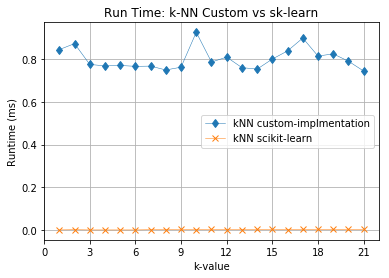

In [37]:
data_to_plt=rt
ylbl="Runtime (ms)"
title_txt='Run Time: k-NN Custom vs sk-learn'
myplot=GetPlot(data_to_plt,ylbl,title_txt)
myplot.savefig(output_folder + '\\1_runtime_sklrn-vs-custom_kNN.png')
myplot.show()

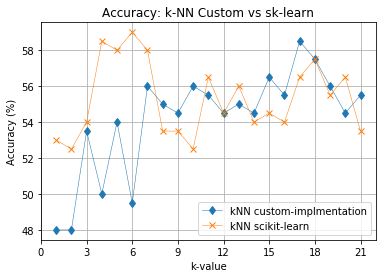

In [38]:
data_to_plt=accrcy
ylbl="Accuracy (%)"
title_txt='Accuracy: k-NN Custom vs sk-learn'
myplot=GetPlot(data_to_plt,ylbl,title_txt)
myplot.savefig(output_folder + '\\1_accuracy_sklrn-vs-custom_kNN.png')
myplot.show()

#### If the input to the K-NN is an even number, what do you expect, and what do you observe? Mention it in the report.

In [39]:
custom_knn_accuracies=accrcy[:,0]    

In [40]:
#odd k values
avg_odd_acc = np.average(custom_knn_accuracies[::2])
print('Average accuracy for odd k-values', avg_odd_acc)

Average accuracy for odd k-values 54.81818181818182


In [41]:
avg_even_acc=np.average(custom_knn_accuracies[1::2])
print('Average accuracy for even k-values', avg_even_acc)

Average accuracy for even k-values 53.5


##### For Odd values of k we observe that the average accuracy is relatively higer than even values of k in kNN for a classification problem
We infer this due to the fact that in case of binary classification if k=2 there is a chance that the training data can only contain sets of same class

eg: 

    [30, 26, 75, 17, 12, 48,  1]

    [46, 26, 18, 76, 88, 85,  1]
    
  This leads to biased classification and leads to poor classification results.
  Hence the best practice is to opt for odd values of k to get rid of biased classification

##### Output files datasets and graphs present in output\1_kNN directory